In [1]:
import warnings
warnings.filterwarnings('ignore')

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [2]:
print(os.getcwd())
#os.chdir('archive/asl_alphabet_train/asl_alphabet_train')
os.listdir()
train_path = './archive/asl_alphabet_train/asl_alphabet_train/'
test_path = './archive/asl_alphabet_test/asl_alphabet_test/'

/Users/jagannathanlakshmipathy/Desktop/UCB/W207/FinalPorject_laptop


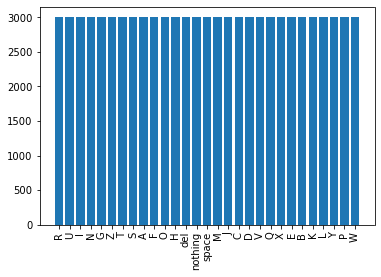

In [7]:
classes = os.listdir(train_path)
nos = []
for i in classes:
    nos.append(len(os.listdir(train_path+i)))
    
plt.bar(classes, nos)
plt.xticks(rotation = 90)

plt.show()

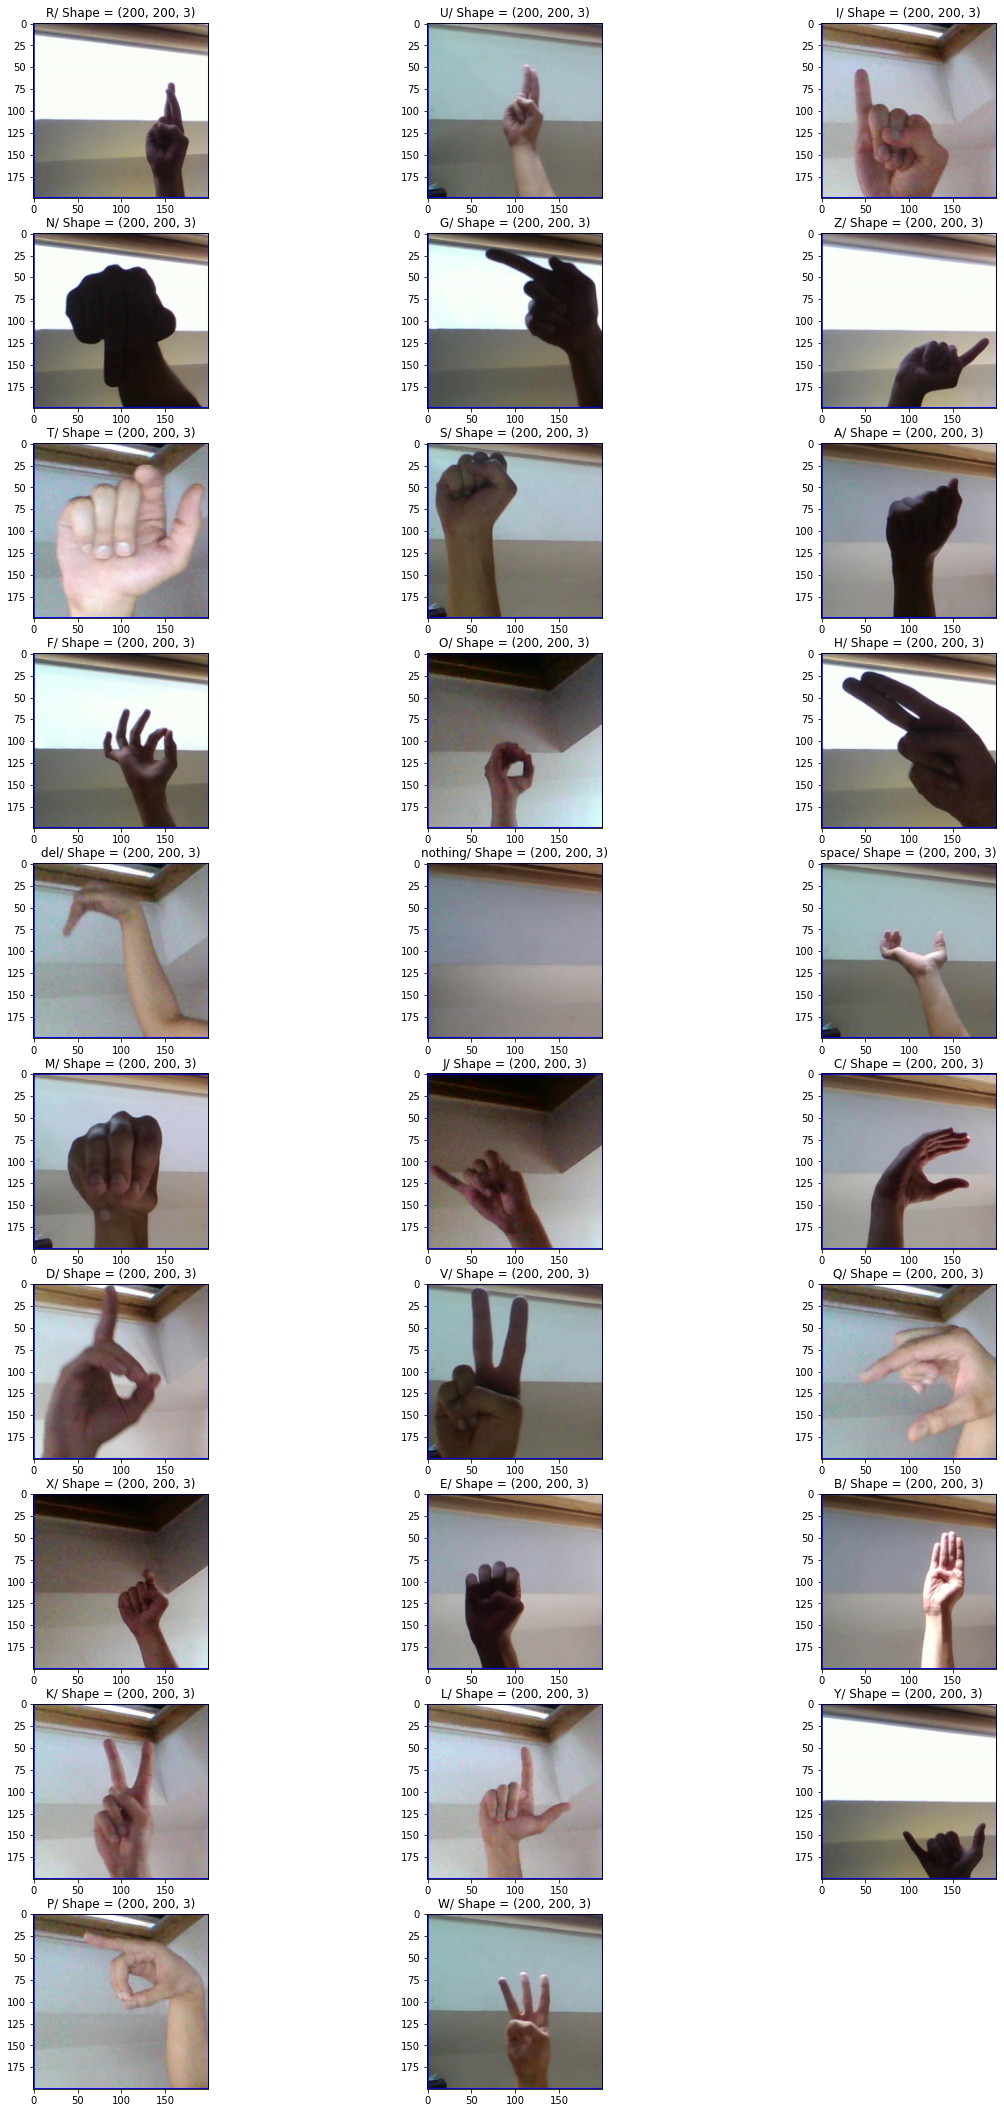

In [8]:
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(train_path+i[1])[0]
    image = Image.open(train_path+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

In [9]:
# Defining the model

def get_model():
    base_model = InceptionResNetV2(include_top=False, input_shape=(200,200,3))
    
    for layer in base_model.layers[:150]:
        layer.trainable = False
    for layer in base_model.layers[150:]:
        layer.trainable = True
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(len(classes), activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [10]:
model = get_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

219070464/219055592 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
___________________________

__________________________________________________________________________________________________
activation_141 (Activation)     (None, 10, 10, 128)  0           batch_normalization_141[0][0]    
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 10, 10, 160)  143360      activation_141[0][0]             
__________________________________________________________________________________________________
batch_normalization_142 (BatchN (None, 10, 10, 160)  480         conv2d_142[0][0]                 
__________________________________________________________________________________________________
activation_142 (Activation)     (None, 10, 10, 160)  0           batch_normalization_142[0][0]    
__________________________________________________________________________________________________
conv2d_140 (Conv2D)             (None, 10, 10, 192)  208896      block17_16_ac[0][0]              
__________

In [12]:
# Creating train and validation sets

datagen = ImageDataGenerator(rescale=1/255, validation_split=0.3)

train = datagen.flow_from_directory(train_path, subset='training')
val = datagen.flow_from_directory(train_path, subset='validation')

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


In [13]:
# Training and validating the model
model.fit(train, epochs=2, batch_size=100, validation_data=val)

Epoch 1/2
 678/1904 [=========>....................] - ETA: 42:00:55 - loss: 0.2177 - accuracy: 0.9370

KeyboardInterrupt: 